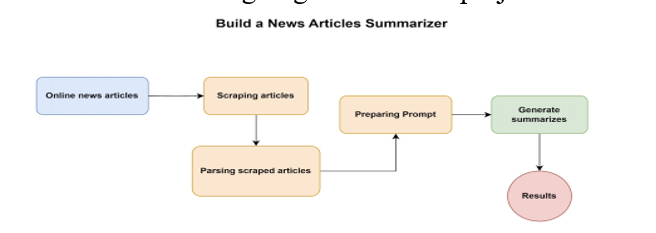

In [1]:
from IPython.display import Image,  display
image_path = r"D:\ujjwal\Building-LLMs-for-Production\media\new_sumarizer_workflow.png"
Image(image_path)


requirements : requests , newpaper3k , langchian 
scrape articles : requests library to extract the contente of the targeted new articles form their urls 

extract title and text : use the newpaper libarary to parse the scrapped html , extracting the title and text form the articles 

preproecessing the text : any ai api 

generate summaries : also ai api 

output 

In [2]:
import json 
from dotenv import load_dotenv 
import requests 
from newspaper import Article

In [3]:
header= {'User-Agent0': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36 Edg/138.0.0.0"}


In [4]:
article_url = "https://kathmandupost.com/money/2025/07/14/kailash-pilgrims-breathe-new-life-into-nepal-s-mountain-economy"

In [5]:
session = requests.Session() 
session

In [6]:
session.get(url= article_url , headers= header , timeout= 10)


<Response [200]>

In [7]:
import requests

# Create a session object
session = requests.Session()

# Set default headers for all requests made with this session
session.headers.update({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) Edge/138.0.0.0'})

# Make a GET request using the session
try :     
    response = session.get('https://kathmandupost.com/money/2025/07/14/kailash-pilgrims-breathe-new-life-into-nepal-s-mountain-economy')
    if response.status_code == 200 :
        
        article= Article(article_url)
        article.download() 
        article.parse() 
        
    else :
        print("failed")

except Exception as e :
    print(f"Error occour while feetching article at {article_url}")
    


In [8]:
response= session.get(url = article_url , headers= header , timeout= 10)
response

<Response [200]>

In [9]:
response.text

'<!DOCTYPE html><html lang="en" ><head><meta charset="utf-8"><meta name="robots" content="" ><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta http-equiv="cache-control" content="no-cache" /><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no"><title>Kailash pilgrims breathe new life into Nepal’s mountain economy</title><meta name="description" content="Transit hubs abuzz in Karnali, with packed hotels and non-stop flights to the Tibet border."><meta name="keyword" content="Transit,hubs,abuzz,in,Karnali,,with,packed,hotels,and,non-stop,flights,to,the,Tibet,border."><meta name="language" content="English"><meta name="revisit-after" content="1 day"><meta property="og:image" content="https://assets-cdn.kathmandupost.com/uploads/source/news/2025/money/2-1752454543.jpg" /><meta property="og:title" content="Kailash pilgrims breathe new life into Nepal’s mountain economy" /><meta property="og:type" content="article"/><meta propert

In [10]:
Article(article_url)

In [11]:
Article(article_url).text

''

In [12]:
article = Article(article_url)
article.download() #Downloads the raw HTML content of the article from the internet. (so that we can process locally )
article.parse() #Processes the HTML to extract title, authors, publish date, main text, images, etc

In [13]:
article.title

'Kailash pilgrims breathe new life into Nepal’s mountain economy'

In [14]:
article.authors

['Kantipur Media Group']

In [15]:
article.publish_date

datetime.datetime(2025, 7, 14, 0, 0)

In [16]:
article.top_image

'https://assets-cdn.kathmandupost.com/uploads/source/news/2025/money/2-1752454543.jpg'

****************************************

Title : Kailash pilgrims breathe new life into Nepal’s mountain economy
Text : Sangam Prasain is Business Editor at The Kathmandu Post, covering tourism, agriculture, mountaineering, aviation, infrastructure and other economic affairs. He joined The Kathmandu Post in October 2009.


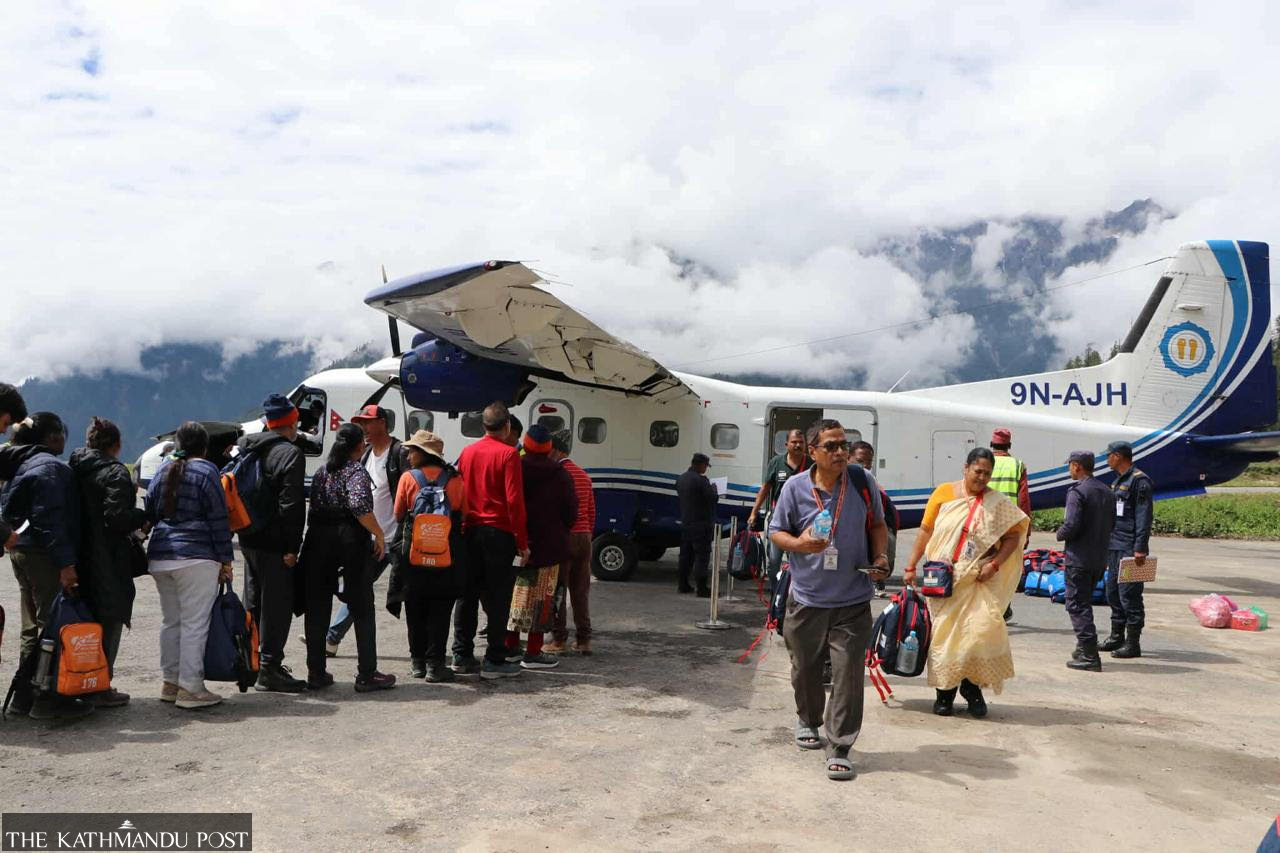

In [17]:
## full code
header= {'User-Agent0': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36 Edg/138.0.0.0"}
article_url = "https://kathmandupost.com/money/2025/07/14/kailash-pilgrims-breathe-new-life-into-nepal-s-mountain-economy"

session = requests.Session() 

try : 
    response= session.get(headers= header , url = article_url , timeout= 10)
    if response.status_code == 200 : 
        article = Article(article_url)
        article.download()
        article.parse() 
        
        
    
        print(f"Title : {article.title}")
        print(f"Text : {article.text}")
        display(Image(article.top_image))
        
    
    else :
        print("failed to parse article")
    
except Exception as e :
    print("faield to request")

******************************************

In [18]:
article.summary

''

## Failed to extract content , only able to extrac title and autho so , so use butifulsoup and readability

In [19]:
import requests
from readability import Document
from bs4 import BeautifulSoup

# URL of the article
article_url = "https://kathmandupost.com/money/2025/07/14/kailash-pilgrims-breathe-new-life-into-nepal-s-mountain-economy"

# Set headers to mimic a real browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

# Fetch the page
response = requests.get(article_url, headers=headers)
response.raise_for_status()  # Raise error if request failed

# Use readability to extract main content HTML
doc = Document(response.text)

# Extract title and main content HTML
title = doc.title()
content_html = doc.summary()

# Parse the main content HTML to clean text
soup = BeautifulSoup(content_html, "html.parser")
article_text = soup.get_text(separator="\n", strip=True)

# Print results
print(f"Title: {title}\n")
print(f"Article content (first 2000 chars):\n{article_text[:2000]}")


Title: Kailash pilgrims breathe new life into Nepal’s mountain economy

Article content (first 2000 chars):
Kailash Patel had waited years for this moment. Standing at the edge of the windswept tarmac in Simkot, a remote airport in northwestern Nepal, he looked tired but elated.
“After a long wait, I finally got to visit Kailash Manasarovar,” said Patel, a resident of Ghatkopar, a suburb in eastern Mumbai. “It was my life’s dream to visit the revered site once, and it came true.”
For Indian pilgrims like Patel, the Kailash Manasarovar yatra is not just a physical journey through some of the harshest terrain on earth—it’s a spiritual odyssey. Revered in Hinduism, Buddhism, and Jainism, Mount Kailash is the mythical abode of Lord Shiva. Pilgrims believe that completing the kora—a sacred 52-kilometre circuit around the mountain—can cleanse a lifetime’s sins.
The pilgrimage has resumed after a five-year pause, triggered first by Covid closures and then by geopolitical tensions. Following d

In [20]:
print(article_text)

Kailash Patel had waited years for this moment. Standing at the edge of the windswept tarmac in Simkot, a remote airport in northwestern Nepal, he looked tired but elated.
“After a long wait, I finally got to visit Kailash Manasarovar,” said Patel, a resident of Ghatkopar, a suburb in eastern Mumbai. “It was my life’s dream to visit the revered site once, and it came true.”
For Indian pilgrims like Patel, the Kailash Manasarovar yatra is not just a physical journey through some of the harshest terrain on earth—it’s a spiritual odyssey. Revered in Hinduism, Buddhism, and Jainism, Mount Kailash is the mythical abode of Lord Shiva. Pilgrims believe that completing the kora—a sacred 52-kilometre circuit around the mountain—can cleanse a lifetime’s sins.
The pilgrimage has resumed after a five-year pause, triggered first by Covid closures and then by geopolitical tensions. Following diplomatic talks in Beijing this January between Chinese Vice Foreign Minister Sun Weidong and Indian Foreign

In [21]:
from langchain.schema import HumanMessage 

In [32]:
a_title= doc.title()


a_text = article_text



In [44]:
#pepare template for the prompt 
template = """ you are a very good assistant  that summarizes online articles  in 10 words. Here's the article you want to summarize.

=================================
Title: {article_title}
{article_text}
================================
Write a summary of the previous article 
"""


In [45]:
promtp = template.format(article_title= a_title,
                         article_text= a_text)

messages = HumanMessage(content= promtp) 

print(messages.content)

 you are a very good assistant  that summarizes online articles  in 10 words. Here's the article you want to summarize.

Title: Kailash pilgrims breathe new life into Nepal’s mountain economy
Kailash Patel had waited years for this moment. Standing at the edge of the windswept tarmac in Simkot, a remote airport in northwestern Nepal, he looked tired but elated.
“After a long wait, I finally got to visit Kailash Manasarovar,” said Patel, a resident of Ghatkopar, a suburb in eastern Mumbai. “It was my life’s dream to visit the revered site once, and it came true.”
For Indian pilgrims like Patel, the Kailash Manasarovar yatra is not just a physical journey through some of the harshest terrain on earth—it’s a spiritual odyssey. Revered in Hinduism, Buddhism, and Jainism, Mount Kailash is the mythical abode of Lord Shiva. Pilgrims believe that completing the kora—a sacred 52-kilometre circuit around the mountain—can cleanse a lifetime’s sins.
The pilgrimage has resumed after a five-year pau

In [46]:
from langchain_groq import ChatGroq
import os 
from dotenv import load_dotenv
load_dotenv()


## load model 
llm = ChatGroq(
    api_key= os.getenv('Groq_key'),
    model="llama-3.3-70b-versatile",
    temperature=0,
    
    
)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000026FD7CC6F50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000026FD7CC6C50>, model_name='llama-3.3-70b-versatile', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********'))

In [47]:
llm.invoke(messages.content)

AIMessage(content="Kailash pilgrims boost Nepal's mountain economy suddenly.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 1622, 'total_tokens': 1635, 'completion_time': 0.078262558, 'prompt_time': 0.09656562, 'queue_time': 0.05406666, 'total_time': 0.174828178}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--29b9be0e-dbf3-440e-ad33-4f5e9fb115da-0', usage_metadata={'input_tokens': 1622, 'output_tokens': 13, 'total_tokens': 1635})

In [48]:
print(llm.invoke(messages.content).content)

Kailash pilgrims boost Nepal's mountain economy suddenly.


# LlamaIndex Introduction

for concept : 
https://github.com/ujjwal-basnet/LLM-FROM-Scratch/blob/main/Numerical%20Look%20at%20LlamaIndex%3A%20Step-by-Step.ipynb

In [49]:
# step 1 
import os 
import llama_index


# step 2  create a data directory 

nepal.txt 

Nepal is a landlocked country in South Asia. It is mainly situated in the Himalayas, but also includes parts of the Indo-Gangetic Plain. With an estimated population of over 30 million, it is the 49th largest country by population and 93rd largest country by area. The capital and largest city is Kathmandu.


print(llm.invoke(messages.content))

In [20]:
response = requests.get(url= article_url, headers= header)
response.text

'<!DOCTYPE html><html lang="en" ><head><meta charset="utf-8"><meta name="robots" content="" ><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta http-equiv="cache-control" content="no-cache" /><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no"><title>Kailash pilgrims breathe new life into Nepal’s mountain economy</title><meta name="description" content="Transit hubs abuzz in Karnali, with packed hotels and non-stop flights to the Tibet border."><meta name="keyword" content="Transit,hubs,abuzz,in,Karnali,,with,packed,hotels,and,non-stop,flights,to,the,Tibet,border."><meta name="language" content="English"><meta name="revisit-after" content="1 day"><meta property="og:image" content="https://assets-cdn.kathmandupost.com/uploads/source/news/2025/money/2-1752454543.jpg" /><meta property="og:title" content="Kailash pilgrims breathe new life into Nepal’s mountain economy" /><meta property="og:type" content="article"/><meta propert

In [21]:
response.raise_for_status()

In [23]:
### use readability to fetch main content 
doc= Document(response.content)
doc

In [24]:
doc= Document(response.text)
doc.title()

'Kailash pilgrims breathe new life into Nepal’s mountain economy'

In [25]:
html = doc.summary()

In [26]:
soup = BeautifulSoup('<b class="boldest">Extremely bold</b>')
tag = soup.b
type(tag)
# <class 'bs4.element.Tag'>

bs4.element.Tag

In [41]:
soup2 = BeautifulSoup("<b id='ke xa bai'>")
soup2

<html><body><b id="ke xa bai"></b></body></html>

In [48]:
tag= soup2.b
tag.attrs
tag['id']

'ke xa bai'

In [ ]:
tag

<p class="boldest">Extremely bold</p>

In [ ]:
tag['']